# Advanced Ensemble Techniques
1 Stacking


2 Blending

3 Bagging

4 Boosting

# #*******************************************Stacking****************************************** 

Stacking is an ensemble learning technique that uses predictions from multiple models (for example decision tree, knn or svm) to build a new model. This model is used for making predictions on the test set

The benefit of stacking is that it can harness the capabilities of a range of well-performing models on a classification or regression task and make predictions that have better performance than any single model in the ensemble.

1) The train set is split into 10 parts.

2) A base model (suppose a decision tree) is fitted on 9 parts and predictions are made for the 10th part. This is done for each part of the train set.

3) The base model (in this case, decision tree) is then fitted on the whole train dataset.

4) Using this model, predictions are made on the test set.

5) Steps 2 to 4 are repeated for another base model (say knn) resulting in another set of predictions for the train set and test set.

6) The predictions from the train set are used as features to build a new model.

7) This model is used to make final predictions on the test prediction set.

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.819 (0.042)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)


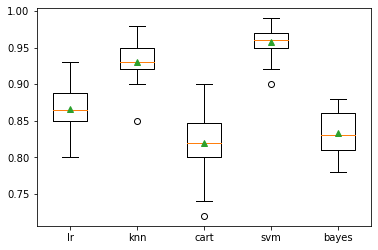

In [1]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# AFTER STACKING THE MODELS

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.820 (0.043)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)
>stacking 0.965 (0.019)


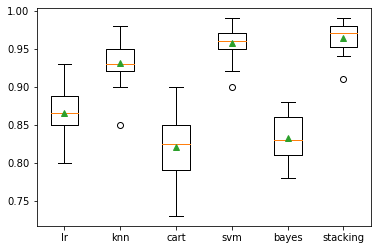

In [2]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y
 
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# FOr binary classification model using LOGISTIC REG as meta model

meta model means output model 

can use anyone of the model as meta model

In [5]:
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# define the base models
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X, y)
# make a prediction for one example
data = [[2.47475454,0.40165523,1.68081787,2.88940715,0.91704519,-3.07950644,4.39961206,0.72464273,-4.86563631,-6.06338084,-1.22209949,-0.4699618,1.01222748,-0.6899355,-0.53000581,6.86966784,-3.27211075,-6.59044146,-2.21290585,-3.139579]]
yhat = model.predict(data)
print('Predicted Class: %d' % (yhat))

Predicted Class: 0


# Stacking for Regression

# BEFORE STACKING

>knn -101.019 (7.161)
>cart -148.642 (9.996)
>svm -162.419 (12.565)


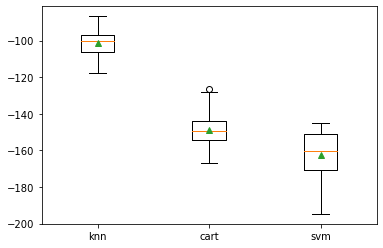

In [6]:

# compare machine learning models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn'] = KNeighborsRegressor()
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# AFTER STACKING

>knn -101.019 (7.161)
>cart -147.971 (10.657)
>svm -162.419 (12.565)
>stacking -56.529 (5.171)


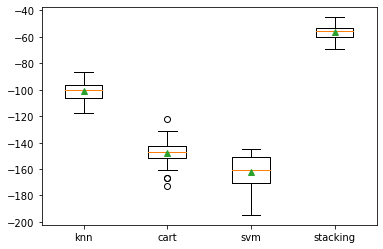

In [7]:

# compare ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
	return X, y
 
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('knn', KNeighborsRegressor()))
	level0.append(('cart', DecisionTreeRegressor()))
	level0.append(('svm', SVR()))
	# define meta learner model
	level1 = LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn'] = KNeighborsRegressor()
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	models['stacking'] = get_stacking()
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Regression example 

In [8]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
# define the base models
level0 = list()
level0.append(('knn', KNeighborsRegressor()))
level0.append(('cart', DecisionTreeRegressor()))
level0.append(('svm', SVR()))
# define meta learner model
level1 = LinearRegression()
# define the stacking ensemble
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X, y)
# make a prediction for one example
data = [[0.59332206,-0.56637507,1.34808718,-0.57054047,-0.72480487,1.05648449,0.77744852,0.07361796,0.88398267,2.02843157,1.01902732,0.11227799,0.94218853,0.26741783,0.91458143,-0.72759572,1.08842814,-0.61450942,-0.69387293,1.69169009]]
yhat = model.predict(data)
print('Predicted Value: %.3f' % (yhat))

Predicted Value: 556.516


# ****************************************************************************************************************************#

# 2 Blending

Blending follows the same approach as stacking but uses only a holdout (validation) set from the train set to make predictions. In other words, unlike stacking, the predictions are made on the holdout set only. The holdout set and the predictions are used to build a model which is run on the test set. 

1) The train set is split into training and validation sets.

2) Model(s) are fitted on the training set.

3) The predictions are made on the validation set and the test set.

4) The validation set and its predictions are used as features to build a new model.

5) This model is used to make final predictions on the test and meta-features

Blending is an ensemble machine learning technique that uses a machine learning model to learn how to best combine the predictions from multiple contributing ensemble member models.

As such, blending is the same as stacked generalization, known as stacking, broadly conceived. Often, blending and stacking are used interchangeably in the same paper or model description

In [ ]:
def get_models():
	models = list()
	models.append(('lr', LogisticRegression()))
	models.append(('knn', KNeighborsClassifier()))
	models.append(('cart', DecisionTreeClassifier()))
	models.append(('svm', SVC(probability=True)))
	models.append(('bayes', GaussianNB()))
	return models

In [ ]:
# fit all models on the training set and predict on hold out set
meta_X = list()
for name, model in models:
	# fit in training set
	model.fit(X_train, y_train)
	# predict on hold out set
	yhat = model.predict(X_val)
	# reshape predictions into a matrix with one column
	yhat = yhat.reshape(len(yhat), 1)
	# store predictions as input for blending
	meta_X.append(yhat)

In [ ]:


# create 2d array from predictions, each set is an input feature
meta_X = hstack(meta_X)

In [ ]:
# define blending model
blender = LogisticRegression()
# fit on predictions from base models
blender.fit(meta_X, y_val)

In [ ]:
def fit_ensemble(models, X_train, X_val, y_train, y_val):
	# fit all models on the training set and predict on hold out set
	meta_X = list()
	for name, model in models:
		# fit in training set
		model.fit(X_train, y_train)
		# predict on hold out set
		yhat = model.predict(X_val)
		# reshape predictions into a matrix with one column
		yhat = yhat.reshape(len(yhat), 1)
		# store predictions as input for blending
		meta_X.append(yhat)
	# create 2d array from predictions, each set is an input feature
	meta_X = hstack(meta_X)
	# define blending model
	blender = LogisticRegression()
	# fit on predictions from base models
	blender.fit(meta_X, y_val)
	return blender

In [ ]:
def predict_ensemble(models, blender, X_test):
	# make predictions with base models
	meta_X = list()
	for name, model in models:
		# predict with base model
		yhat = model.predict(X_test)
		# reshape predictions into a matrix with one column
		yhat = yhat.reshape(len(yhat), 1)
		# store prediction
		meta_X.append(yhat)
	# create 2d array from predictions, each set is an input feature
	meta_X = hstack(meta_X)
	# predict
	return blender.predict(meta_X)

# Blending Ensemble for Classification

In [9]:

# blending ensemble for classification using hard voting
from numpy import hstack
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y
 
# get a list of base models
def get_models():
	models = list()
	models.append(('lr', LogisticRegression()))
	models.append(('knn', KNeighborsClassifier()))
	models.append(('cart', DecisionTreeClassifier()))
	models.append(('svm', SVC()))
	models.append(('bayes', GaussianNB()))
	return models
 
# fit the blending ensemble
def fit_ensemble(models, X_train, X_val, y_train, y_val):
	# fit all models on the training set and predict on hold out set
	meta_X = list()
	for name, model in models:
		# fit in training set
		model.fit(X_train, y_train)
		# predict on hold out set
		yhat = model.predict(X_val)
		# reshape predictions into a matrix with one column
		yhat = yhat.reshape(len(yhat), 1)
		# store predictions as input for blending
		meta_X.append(yhat)
	# create 2d array from predictions, each set is an input feature
	meta_X = hstack(meta_X)
	# define blending model
	blender = LogisticRegression()
	# fit on predictions from base models
	blender.fit(meta_X, y_val)
	return blender
 
# make a prediction with the blending ensemble
def predict_ensemble(models, blender, X_test):
	# make predictions with base models
	meta_X = list()
	for name, model in models:
		# predict with base model
		yhat = model.predict(X_test)
		# reshape predictions into a matrix with one column
		yhat = yhat.reshape(len(yhat), 1)
		# store prediction
		meta_X.append(yhat)
	# create 2d array from predictions, each set is an input feature
	meta_X = hstack(meta_X)
	# predict
	return blender.predict(meta_X)
 
# define dataset
X, y = get_dataset()
# split dataset into train and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
# split training set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.33, random_state=1)
# summarize data split
print('Train: %s, Val: %s, Test: %s' % (X_train.shape, X_val.shape, X_test.shape))
# create the base models
models = get_models()
# train the blending ensemble
blender = fit_ensemble(models, X_train, X_val, y_train, y_val)
# make predictions on test set
yhat = predict_ensemble(models, blender, X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Blending Accuracy: %.3f' % (score*100))

Train: (3350, 20), Val: (1650, 20), Test: (5000, 20)
Blending Accuracy: 97.800


# BLENDING:binary classification problem

In [10]:

# blending ensemble for classification using soft voting
from numpy import hstack
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y
 
# get a list of base models
def get_models():
	models = list()
	models.append(('lr', LogisticRegression()))
	models.append(('knn', KNeighborsClassifier()))
	models.append(('cart', DecisionTreeClassifier()))
	models.append(('svm', SVC(probability=True)))
	models.append(('bayes', GaussianNB()))
	return models
 
# fit the blending ensemble
def fit_ensemble(models, X_train, X_val, y_train, y_val):
	# fit all models on the training set and predict on hold out set
	meta_X = list()
	for name, model in models:
		# fit in training set
		model.fit(X_train, y_train)
		# predict on hold out set
		yhat = model.predict_proba(X_val)
		# store predictions as input for blending
		meta_X.append(yhat)
	# create 2d array from predictions, each set is an input feature
	meta_X = hstack(meta_X)
	# define blending model
	blender = LogisticRegression()
	# fit on predictions from base models
	blender.fit(meta_X, y_val)
	return blender
 
# make a prediction with the blending ensemble
def predict_ensemble(models, blender, X_test):
	# make predictions with base models
	meta_X = list()
	for name, model in models:
		# predict with base model
		yhat = model.predict_proba(X_test)
		# store prediction
		meta_X.append(yhat)
	# create 2d array from predictions, each set is an input feature
	meta_X = hstack(meta_X)
	# predict
	return blender.predict(meta_X)
 
# define dataset
X, y = get_dataset()
# split dataset into train and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
# split training set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.33, random_state=1)
# summarize data split
print('Train: %s, Val: %s, Test: %s' % (X_train.shape, X_val.shape, X_test.shape))
# create the base models
models = get_models()
# train the blending ensemble
blender = fit_ensemble(models, X_train, X_val, y_train, y_val)
# make predictions on test set
yhat = predict_ensemble(models, blender, X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Blending Accuracy: %.3f' % (score*100))

Train: (3350, 20), Val: (1650, 20), Test: (5000, 20)
Blending Accuracy: 98.220


# A blending ensemble is only effective if it is able to out-perform any single contributing model.

We can confirm this by evaluating each of the base models in isolation. Each base model can be fit on the entire training dataset (unlike the blending ensemble) and evaluated on the test dataset (just like the blending ensemble).

In [11]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y
 
# get a list of base models
def get_models():
	models = list()
	models.append(('lr', LogisticRegression()))
	models.append(('knn', KNeighborsClassifier()))
	models.append(('cart', DecisionTreeClassifier()))
	models.append(('svm', SVC(probability=True)))
	models.append(('bayes', GaussianNB()))
	return models
 
# define dataset
X, y = get_dataset()
# split dataset into train and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
# summarize data split
print('Train: %s, Test: %s' % (X_train_full.shape, X_test.shape))
# create the base models
models = get_models()
# evaluate standalone model
for name, model in models:
	# fit the model on the training dataset
	model.fit(X_train_full, y_train_full)
	# make a prediction on the test dataset
	yhat = model.predict(X_test)
	# evaluate the predictions
	score = accuracy_score(y_test, yhat)
	# report the score
	print('>%s Accuracy: %.3f' % (name, score*100))

Train: (5000, 20), Test: (5000, 20)
>lr Accuracy: 87.800
>knn Accuracy: 97.380
>cart Accuracy: 88.740
>svm Accuracy: 98.200
>bayes Accuracy: 87.300


# The complete example of making a prediction on new data with a blending ensemble for classification 

In [12]:

# example of making a prediction with a blending ensemble for classification
from numpy import hstack
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y
 
# get a list of base models
def get_models():
	models = list()
	models.append(('lr', LogisticRegression()))
	models.append(('knn', KNeighborsClassifier()))
	models.append(('cart', DecisionTreeClassifier()))
	models.append(('svm', SVC(probability=True)))
	models.append(('bayes', GaussianNB()))
	return models
 
# fit the blending ensemble
def fit_ensemble(models, X_train, X_val, y_train, y_val):
	# fit all models on the training set and predict on hold out set
	meta_X = list()
	for _, model in models:
		# fit in training set
		model.fit(X_train, y_train)
		# predict on hold out set
		yhat = model.predict_proba(X_val)
		# store predictions as input for blending
		meta_X.append(yhat)
	# create 2d array from predictions, each set is an input feature
	meta_X = hstack(meta_X)
	# define blending model
	blender = LogisticRegression()
	# fit on predictions from base models
	blender.fit(meta_X, y_val)
	return blender
 
# make a prediction with the blending ensemble
def predict_ensemble(models, blender, X_test):
	# make predictions with base models
	meta_X = list()
	for _, model in models:
		# predict with base model
		yhat = model.predict_proba(X_test)
		# store prediction
		meta_X.append(yhat)
	# create 2d array from predictions, each set is an input feature
	meta_X = hstack(meta_X)
	# predict
	return blender.predict(meta_X)
 
# define dataset
X, y = get_dataset()
# split dataset set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize data split
print('Train: %s, Val: %s' % (X_train.shape, X_val.shape))
# create the base models
models = get_models()
# train the blending ensemble
blender = fit_ensemble(models, X_train, X_val, y_train, y_val)
# make a prediction on a new row of data
row = [-0.30335011, 2.68066314, 2.07794281, 1.15253537, -2.0583897, -2.51936601, 0.67513028, -3.20651939, -1.60345385, 3.68820714, 0.05370913, 1.35804433, 0.42011397, 1.4732839, 2.89997622, 1.61119399, 7.72630965, -2.84089477, -1.83977415, 1.34381989]
yhat = predict_ensemble(models, blender, [row])
# summarize prediction
print('Predicted Class: %d' % (yhat))

Train: (6700, 20), Val: (3300, 20)
Predicted Class: 1


# Blending Ensemble for Regression

In [13]:
from numpy import hstack
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# get the dataset
def get_dataset():
	X, y = make_regression(n_samples=10000, n_features=20, n_informative=10, noise=0.3, random_state=7)
	return X, y

# get a list of base models
def get_models():
	models = list()
	models.append(('lr', LinearRegression()))
	models.append(('knn', KNeighborsRegressor()))
	models.append(('cart', DecisionTreeRegressor()))
	models.append(('svm', SVR()))
	return models

# fit the blending ensemble
def fit_ensemble(models, X_train, X_val, y_train, y_val):
	# fit all models on the training set and predict on hold out set
	meta_X = list()
	for name, model in models:
		# fit in training set
		model.fit(X_train, y_train)
		# predict on hold out set
		yhat = model.predict(X_val)
		# reshape predictions into a matrix with one column
		yhat = yhat.reshape(len(yhat), 1)
		# store predictions as input for blending
		meta_X.append(yhat)
	# create 2d array from predictions, each set is an input feature
	meta_X = hstack(meta_X)
	# define blending model
	blender = LinearRegression()
	# fit on predictions from base models
	blender.fit(meta_X, y_val)
	return blender

# make a prediction with the blending ensemble
def predict_ensemble(models, blender, X_test):
	# make predictions with base models
	meta_X = list()
	for name, model in models:
		# predict with base model
		yhat = model.predict(X_test)
		# reshape predictions into a matrix with one column
		yhat = yhat.reshape(len(yhat), 1)
		# store prediction
		meta_X.append(yhat)
	# create 2d array from predictions, each set is an input feature
	meta_X = hstack(meta_X)
	# predict
	return blender.predict(meta_X)

# define dataset
X, y = get_dataset()
# split dataset into train and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
# split training set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.33, random_state=1)
# summarize data split
print('Train: %s, Val: %s, Test: %s' % (X_train.shape, X_val.shape, X_test.shape))
# create the base models
models = get_models()
# train the blending ensemble
blender = fit_ensemble(models, X_train, X_val, y_train, y_val)
# make predictions on test set
yhat = predict_ensemble(models, blender, X_test)
# evaluate predictions
score = mean_absolute_error(y_test, yhat)
print('Blending MAE: %.3f' % score)

Train: (3350, 20), Val: (1650, 20), Test: (5000, 20)
Blending MAE: 0.237


In [14]:
from numpy import hstack
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
 
# get the dataset
def get_dataset():
	X, y = make_regression(n_samples=10000, n_features=20, n_informative=10, noise=0.3, random_state=7)
	return X, y
 
# get a list of base models
def get_models():
	models = list()
	models.append(('lr', LinearRegression()))
	models.append(('knn', KNeighborsRegressor()))
	models.append(('cart', DecisionTreeRegressor()))
	models.append(('svm', SVR()))
	return models
 
# define dataset
X, y = get_dataset()
# split dataset into train and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
# summarize data split
print('Train: %s, Test: %s' % (X_train_full.shape, X_test.shape))
# create the base models
models = get_models()
# evaluate standalone model
for name, model in models:
	# fit the model on the training dataset
	model.fit(X_train_full, y_train_full)
	# make a prediction on the test dataset
	yhat = model.predict(X_test)
	# evaluate the predictions
	score = mean_absolute_error(y_test, yhat)
	# report the score
	print('>%s MAE: %.3f' % (name, score))

Train: (5000, 20), Test: (5000, 20)
>lr MAE: 0.236
>knn MAE: 100.169
>cart MAE: 132.470
>svm MAE: 138.195


# The complete example of making a prediction on new data with a blending ensemble for regression

In [15]:
from numpy import hstack
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
 
# get the dataset
def get_dataset():
	X, y = make_regression(n_samples=10000, n_features=20, n_informative=10, noise=0.3, random_state=7)
	return X, y
 
# get a list of base models
def get_models():
	models = list()
	models.append(('lr', LinearRegression()))
	models.append(('knn', KNeighborsRegressor()))
	models.append(('cart', DecisionTreeRegressor()))
	models.append(('svm', SVR()))
	return models
 
# fit the blending ensemble
def fit_ensemble(models, X_train, X_val, y_train, y_val):
	# fit all models on the training set and predict on hold out set
	meta_X = list()
	for _, model in models:
		# fit in training set
		model.fit(X_train, y_train)
		# predict on hold out set
		yhat = model.predict(X_val)
		# reshape predictions into a matrix with one column
		yhat = yhat.reshape(len(yhat), 1)
		# store predictions as input for blending
		meta_X.append(yhat)
	# create 2d array from predictions, each set is an input feature
	meta_X = hstack(meta_X)
	# define blending model
	blender = LinearRegression()
	# fit on predictions from base models
	blender.fit(meta_X, y_val)
	return blender
 
# make a prediction with the blending ensemble
def predict_ensemble(models, blender, X_test):
	# make predictions with base models
	meta_X = list()
	for _, model in models:
		# predict with base model
		yhat = model.predict(X_test)
		# reshape predictions into a matrix with one column
		yhat = yhat.reshape(len(yhat), 1)
		# store prediction
		meta_X.append(yhat)
	# create 2d array from predictions, each set is an input feature
	meta_X = hstack(meta_X)
	# predict
	return blender.predict(meta_X)
 
# define dataset
X, y = get_dataset()
# split dataset set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize data split
print('Train: %s, Val: %s' % (X_train.shape, X_val.shape))
# create the base models
models = get_models()
# train the blending ensemble
blender = fit_ensemble(models, X_train, X_val, y_train, y_val)
# make a prediction on a new row of data
row = [-0.24038754, 0.55423865, -0.48979221, 1.56074459, -1.16007611, 1.10049103, 1.18385406, -1.57344162, 0.97862519, -0.03166643, 1.77099821, 1.98645499, 0.86780193, 2.01534177, 2.51509494, -1.04609004, -0.19428148, -0.05967386, -2.67168985, 1.07182911]
yhat = predict_ensemble(models, blender, [row])
# summarize prediction
print('Predicted: %.3f' % (yhat[0]))

Train: (6700, 20), Val: (3300, 20)
Predicted: 359.988


In [ ]:
**********************************************************************************************************************************

# BAGGING Bootstrap Aggregation, or Bagging for short, is an ensemble machine learning algorithm.

The idea behind bagging is combining the results of multiple models (for instance, all decision trees) to get a generalized result. Here’s a question: If you create all the models on the same set of data and combine it, will it be useful? There is a high chance that these models will give the same result since they are getting the same input. So how can we solve this problem? One of the techniques is bootstrapping.

Bootstrapping is a sampling technique in which we create subsets of observations from the original dataset, with replacement. The size of the subsets is the same as the size of the original set.

Bagging (or Bootstrap Aggregating) technique uses these subsets (bags) to get a fair idea of the distribution (complete set). The size of subsets created for bagging may be less than the original set.

* Multiple subsets are created from the original dataset, selecting observations with replacement.

* A base model (weak model) is created on each of these subsets.

* The models run in parallel and are independent of each other.

* The final predictions are determined by combining the predictions from all the models.

# Bagging for Classification

In [16]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the model
model = BaggingClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.855 (0.033)


# binary classification dataset

In [17]:
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the model
model = BaggingClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-4.7705504,-1.88685058,-0.96057964,2.53850317,-6.5843005,3.45711663,-7.46225013,2.01338213,-0.45086384,-1.89314931,-2.90675203,-0.21214568,-0.9623956,3.93862591,0.06276375,0.33964269,4.0835676,1.31423977,-2.17983117,3.1047287]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


# Bagging for Regression

In [18]:

# evaluate bagging ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=5)
# define the model
model = BaggingRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -100.379 (9.225)


In [19]:
# bagging ensemble for making predictions for regression
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=5)
# define the model
model = BaggingRegressor()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[0.88950817,-0.93540416,0.08392824,0.26438806,-0.52828711,-1.21102238,-0.4499934,1.47392391,-0.19737726,-0.22252503,0.02307668,0.26953276,0.03572757,-0.51606983,-0.39937452,1.8121736,-0.00775917,-0.02514283,-0.76089365,1.58692212]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: -135


# Bagging Hyperparameters

An important hyperparameter for the Bagging algorithm is the number of decision trees used in the ensemble.

Typically, the number of trees is increased until the model performance stabilizes. Intuition might suggest that more trees will lead to overfitting, although this is not the case. Bagging and related ensemble of decision trees algorithms (like random forest) appear to be somewhat immune to overfitting the training dataset given the stochastic nature of the learning algorithm.

The number of trees can be set via the “n_estimators” argument and defaults to 100.

>10 0.853 (0.041)
>50 0.878 (0.038)
>100 0.882 (0.032)
>500 0.885 (0.038)
>1000 0.887 (0.039)
>5000 0.886 (0.036)


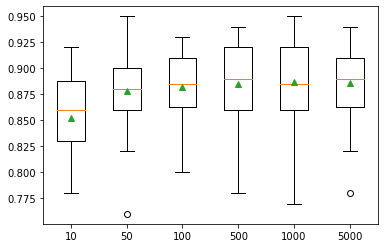

In [20]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = BaggingClassifier(n_estimators=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Explore Number of Samples

The size of the bootstrap sample can also be varied.

The default is to create a bootstrap sample that has the same number of examples as the original dataset. Using a smaller dataset can increase the variance of the resulting decision trees and could result in better overall performance.

The number of samples used to fit each decision tree is set via the “max_samples” argument.

The example below explores different sized samples as a ratio of the original dataset from 10 percent to 100 percent (the default).

>0.1 0.822 (0.040)
>0.2 0.827 (0.049)
>0.3 0.849 (0.043)
>0.4 0.849 (0.032)
>0.5 0.850 (0.033)
>0.6 0.858 (0.038)
>0.7 0.858 (0.044)
>0.8 0.860 (0.036)
>0.9 0.862 (0.039)
>1.0 0.860 (0.034)


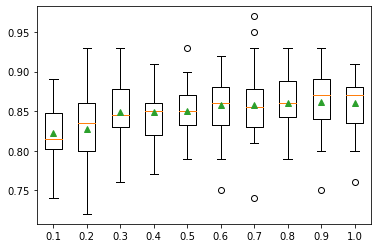

In [21]:

# explore bagging ensemble number of samples effect on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# explore ratios from 10% to 100% in 10% increments
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		models[key] = BaggingClassifier(max_samples=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Explore Alternate Algorithm

Decision trees are the most common algorithm used in a bagging ensemble.

The reason for this is that they are easy to configure to have a high variance and because they perform well in general.

Other algorithms can be used with bagging and must be configured to have a modestly high variance. One example is the k-nearest neighbors algorithm where the k value can be set to a low value.

The algorithm used in the ensemble is specified via the “base_estimator” argument and must be set to an instance of the algorithm and algorithm configuration to use.

The example below demonstrates using a KNeighborsClassifier as the base algorithm used in the bagging ensemble. Here, the algorithm is used with default hyperparameters where k is set to 5.

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the model
model = BaggingClassifier(base_estimator=KNeighborsClassifier())
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

We can test different values of k to find the right balance of model variance to achieve good performance as a bagged ensemble.

# example tests bagged KNN models with k values between 1 and 10.

>1 0.880 (0.035)
>2 0.885 (0.034)
>3 0.889 (0.034)
>4 0.886 (0.040)
>5 0.885 (0.032)
>6 0.880 (0.034)
>7 0.877 (0.039)
>8 0.877 (0.040)
>9 0.874 (0.036)
>10 0.873 (0.040)


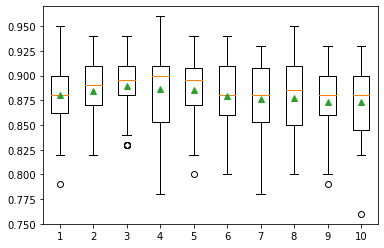

In [22]:

# explore bagging ensemble k for knn effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# evaluate k values from 1 to 20
	for i in range(1,11):
		# define the base model
		base = KNeighborsClassifier(n_neighbors=i)
		# define the ensemble model
		models[str(i)] = BaggingClassifier(base_estimator=base)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Bagging Extensions

There are many modifications and extensions to the bagging algorithm in an effort to improve the performance of the approach.

Perhaps the most famous is the random forest algorithm.

There is a number of less famous, although still effective, extensions to bagging that may be interesting to investigate.

This section demonstrates some of these approaches, such as pasting ensemble, random subspace ensemble, and the random patches ensemble.

We are not racing these extensions on the dataset, but rather providing working examples of how to use each technique that you can copy-paste and try with your own dataset.

# Pasting Ensemble

The Pasting Ensemble is an extension to bagging that involves fitting ensemble members based on random samples of the training dataset instead of bootstrap samples.

The approach is designed to use smaller sample sizes than the training dataset in cases where the training dataset does not fit into memory.

The procedure takes small pieces of the data, grows a predictor on each small piece and then pastes these predictors together. A version is given that scales up to terabyte data sets. The methods are also applicable to on-line learning.

— Pasting Small Votes for Classification in Large Databases and On-Line, 1999.

The example below demonstrates the Pasting ensemble by setting the “bootstrap” argument to “False” and setting the number of samples used in the training dataset via “max_samples” to a modest value, in this case, 50 percent of the training dataset size.

In [23]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the model
model = BaggingClassifier(bootstrap=False, max_samples=0.5)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.848 (0.036)


# Random Subspaces Ensemble

A Random Subspace Ensemble is an extension to bagging that involves fitting ensemble members based on datasets constructed from random subsets of the features in the training dataset.

It is similar to the random forest except the data samples are random rather than a bootstrap sample and the subset of features is selected for the entire decision tree rather than at each split point in the tree.

The classifier consists of multiple trees constructed systematically by pseudorandomly selecting subsets of components of the feature vector, that is, trees constructed in randomly chosen subspaces.

In [24]:
# evaluate random subspace ensemble algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the model
model = BaggingClassifier(bootstrap=False, max_features=10)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.860 (0.036)


>1 0.590 (0.050)
>2 0.662 (0.053)
>3 0.741 (0.046)
>4 0.778 (0.045)
>5 0.803 (0.040)
>6 0.835 (0.037)
>7 0.831 (0.036)
>8 0.853 (0.036)
>9 0.851 (0.033)
>10 0.853 (0.040)
>11 0.854 (0.039)
>12 0.860 (0.045)
>13 0.861 (0.038)
>14 0.854 (0.040)
>15 0.854 (0.044)
>16 0.846 (0.041)
>17 0.833 (0.045)
>18 0.824 (0.049)
>19 0.811 (0.048)
>20 0.800 (0.044)


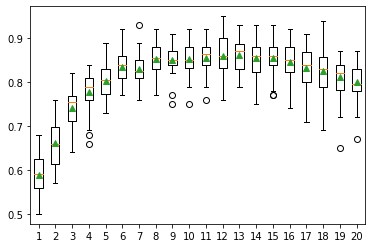

In [25]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1, 21):
		models[str(i)] = BaggingClassifier(bootstrap=False, max_features=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Random Patches Ensemble

 The Random Patches Ensemble is an extension to bagging that involves fitting ensemble members based on datasets constructed from random subsets of rows (samples) and columns (features) of the training dataset.

It does not use bootstrap samples and might be considered an ensemble that combines both the random sampling of the dataset of the Pasting ensemble and the random sampling of features of the Random Subspace ensemble

In [26]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the model
model = BaggingClassifier(bootstrap=False, max_features=10, max_samples=0.5)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.849 (0.032)


# Bagging and Pasting

Bagging and Pasting in Scikit-Learn

In [28]:
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [32]:

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [33]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

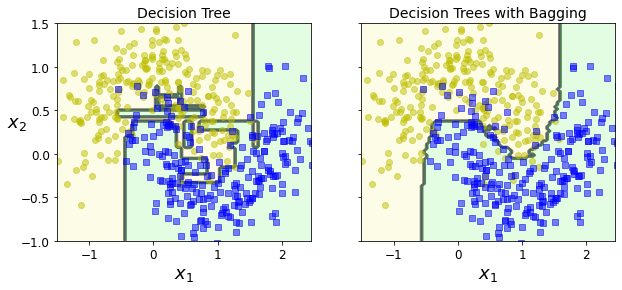

In [34]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")

plt.show()

# Out-of-Bag evaluation

While making the samples, data points were chosen randomly and with replacement, and the data points which fail to be a part of that particular sample are known as OUT-OF-BAG points.

In [35]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.8986666666666666

In [36]:
bag_clf.oob_decision_function_

array([[0.32275132, 0.67724868],
       [0.34117647, 0.65882353],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.09497207, 0.90502793],
       [0.31147541, 0.68852459],
       [0.01754386, 0.98245614],
       [0.97109827, 0.02890173],
       [0.97765363, 0.02234637],
       [0.74404762, 0.25595238],
       [0.        , 1.        ],
       [0.7173913 , 0.2826087 ],
       [0.85026738, 0.14973262],
       [0.97222222, 0.02777778],
       [0.0625    , 0.9375    ],
       [0.        , 1.        ],
       [0.97837838, 0.02162162],
       [0.94642857, 0.05357143],
       [1.        , 0.        ],
       [0.01704545, 0.98295455],
       [0.39473684, 0.60526316],
       [0.88700565, 0.11299435],
       [1.        , 0.        ],
       [0.97790055, 0.02209945],
       [0.        , 1.        ],
       [0.99428571, 0.00571429],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.62569832, 0.37430168],
       [0.

In [37]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

In [ ]:
**************************************************************************************************************************************************************************

# RANDOM FOREST

 Random forest involves constructing a large number of decision trees from bootstrap samples from the training dataset, like bagging.

Unlike bagging, random forest also involves selecting a subset of input features (columns or variables) at each split point in the construction of trees. Typically, constructing a decision tree involves evaluating the value for each input variable in the data in order to select a split point. By reducing the features to a random subset that may be considered at each split point, it forces each decision tree in the ensemble to be more different.

# RAndom Forest For Classification

In [38]:

# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.903 (0.025)


# binary classification

In [39]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-8.52381793,5.24451077,-12.14967704,-2.92949242,0.99314133,0.67326595,-0.38657932,1.27955683,-0.60712621,3.20807316,0.60504151,-1.38706415,8.92444588,-7.43027595,-2.33653219,1.10358169,0.21547782,1.05057966,0.6975331,0.26076035]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


# Example :2 for classification

In [40]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [41]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
    n_estimators=500, random_state=42)

In [42]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [43]:
np.sum(y_pred == y_pred_rf) / len(y_pred)

1.0

# Feature Importance

In [44]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [45]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

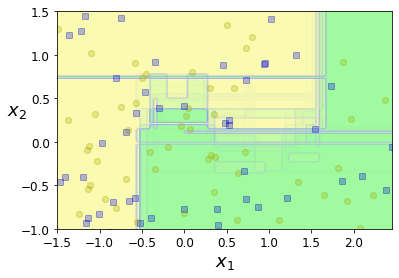

In [46]:
plt.figure(figsize=(6, 4))

for i in range(15):
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=16, random_state=42 + i)
    indices_with_replacement = np.random.randint(0, len(X_train), len(X_train))
    tree_clf.fit(X_train[indices_with_replacement], y_train[indices_with_replacement])
    plot_decision_boundary(tree_clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.02, contour=False)

plt.show()

# Example:3 Feature Importance 

In [47]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [48]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(random_state=42)

In [49]:

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

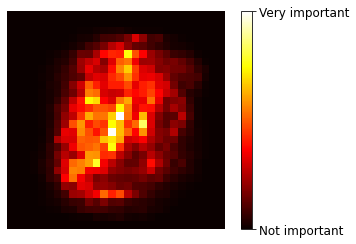

In [50]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()

# Random Forest For Regression

In [51]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
# define the model
model = RandomForestRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -90.518 (7.946)


In [52]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
# define the model
model = RandomForestRegressor()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-0.89483109,-1.0670149,-0.25448694,-0.53850126,0.21082105,1.37435592,0.71203659,0.73093031,-1.25878104,-2.01656886,0.51906798,0.62767387,0.96250155,1.31410617,-1.25527295,-0.85079036,0.24129757,-0.17571721,-1.11454339,0.36268268]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: -168


# Random Forest Hyperparameters


1) Explore Number of Samples

2) Explore Number of Features

3) Explore Number of Trees

4) Explore Tree Depth

# Explore Number of Samples

Each decision tree in the ensemble is fit on a bootstrap sample drawn from the training dataset.

This can be turned off by setting the “bootstrap” argument to False, if you desire. In that case, the whole training dataset will be used to train each decision tree. This is not recommended.

The “max_samples” argument can be set to a float between 0 and 1 to control the percentage of the size of the training dataset to make the bootstrap sample used to train each decision tree.

For example, if the training dataset has 100 rows, the max_samples argument could be set to 0.5 and each decision tree will be fit on a bootstrap sample with (100 * 0.5) or 50 rows of data.

A smaller sample size will make trees more different, and a larger sample size will make the trees more similar. Setting max_samples to “None” will make the sample size the same size as the training dataset and this is the default.

# The effect of different bootstrap sample sizes from 10 percent to 100 percent on the random forest algorithm.

>0.1 0.857 (0.033)
>0.2 0.869 (0.031)
>0.3 0.883 (0.030)
>0.4 0.887 (0.025)
>0.5 0.895 (0.027)
>0.6 0.894 (0.026)
>0.7 0.898 (0.024)
>0.8 0.902 (0.029)
>0.9 0.905 (0.024)
>1.0 0.904 (0.025)


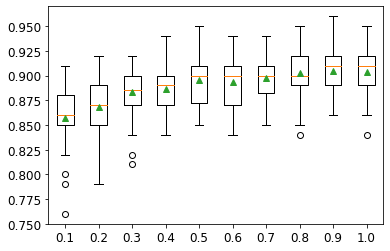

In [53]:
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# explore ratios from 10% to 100% in 10% increments
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		# set max_samples=None to use 100%
		if i == 1.0:
			i = None
		models[key] = RandomForestClassifier(max_samples=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Explore Number of Features

The number of features that is randomly sampled for each split point is perhaps the most important feature to configure for random forest.

It is set via the max_features argument and defaults to the square root of the number of input features. In this case, for our test dataset, this would be sqrt(20) or about four features

>1 0.891 (0.023)
>2 0.900 (0.026)
>3 0.907 (0.025)
>4 0.905 (0.031)
>5 0.903 (0.023)
>6 0.902 (0.023)
>7 0.897 (0.025)


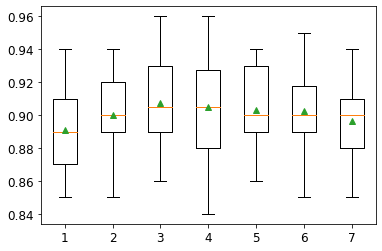

In [54]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# explore number of features from 1 to 7
	for i in range(1,8):
		models[str(i)] = RandomForestClassifier(max_features=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Explore Number of Trees

The number of trees is another key hyperparameter to configure for the random forest.

Typically, the number of trees is increased until the model performance stabilizes. Intuition might suggest that more trees will lead to overfitting, although this is not the case. Both bagging and random forest algorithms appear to be somewhat immune to overfitting the training dataset given the stochastic nature of the learning algorithm.

The number of trees can be set via the “n_estimators” argument and defaults to 100.

The example below explores the effect of the number of trees with values between 10 to 1,000.

>10 0.862 (0.038)
>50 0.896 (0.025)
>100 0.905 (0.026)
>500 0.903 (0.023)
>1000 0.906 (0.022)


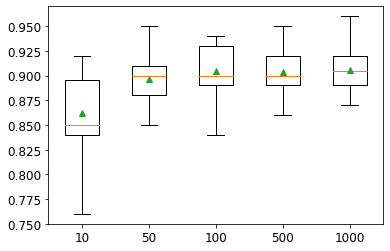

In [55]:

# explore random forest number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000]
	for n in n_trees:
		models[str(n)] = RandomForestClassifier(n_estimators=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Explore Tree Depth
A final interesting hyperparameter is the maximum depth of decision trees used in the ensemble.

By default, trees are constructed to an arbitrary depth and are not pruned. This is a sensible default, although we can also explore fitting trees with different fixed depths.

The maximum tree depth can be specified via the max_depth argument and is set to None (no maximum depth) by default.

>1 0.776 (0.045)
>2 0.814 (0.035)
>3 0.840 (0.034)
>4 0.853 (0.031)
>5 0.875 (0.025)
>6 0.883 (0.027)
>7 0.888 (0.027)
>None 0.902 (0.025)


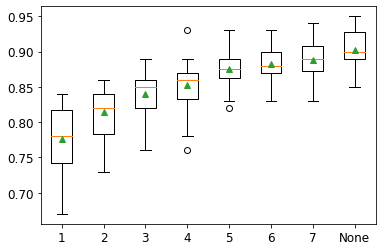

In [56]:

# explore random forest tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# consider tree depths from 1 to 7 and None=full
	depths = [i for i in range(1,8)] + [None]
	for n in depths:
		models[str(n)] = RandomForestClassifier(max_depth=n)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
***************************************************************************************************************8

# BOOSTING Techniques

In [57]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

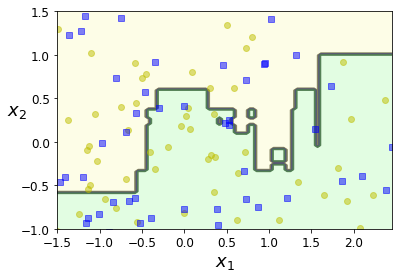

In [58]:
plot_decision_boundary(ada_clf, X, y)

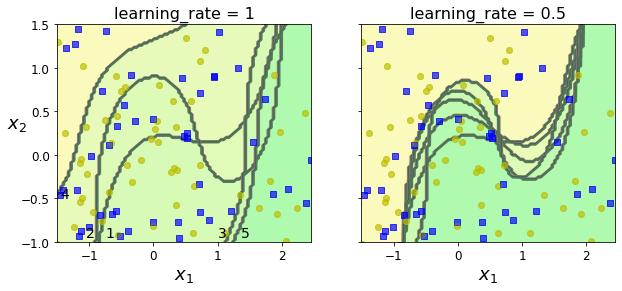

In [59]:
m = len(X_train)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m) / m
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.2, gamma=0.6, random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights * m)
        y_pred = svm_clf.predict(X_train)

        r = sample_weights[y_pred != y_train].sum() / sample_weights.sum() # equation 7-1
        alpha = learning_rate * np.log((1 - r) / r) # equation 7-2
        sample_weights[y_pred != y_train] *= np.exp(alpha) # equation 7-3
        sample_weights /= sample_weights.sum() # normalization step

        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 0:
        plt.text(-0.75, -0.95, "1", fontsize=14)
        plt.text(-1.05, -0.95, "2", fontsize=14)
        plt.text(1.0, -0.95, "3", fontsize=14)
        plt.text(-1.45, -0.5, "4", fontsize=14)
        plt.text(1.36,  -0.95, "5", fontsize=14)
    else:
        plt.ylabel("")

plt.show()

# AdaBoost for Classification

In [60]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model
model = AdaBoostClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.806 (0.041)


# binary classification

In [61]:
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model
model = AdaBoostClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-3.47224758,1.95378146,0.04875169,-0.91592588,-3.54022468,1.96405547,-7.72564954,-2.64787168,-1.81726906,-1.67104974,2.33762043,-4.30273117,0.4839841,-1.28253034,-10.6704077,-0.7641103,-3.58493721,2.07283886,0.08385173,0.91461126]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 0


# AdaBoost for Regression

In [62]:
# from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=6)
# define the model
model = AdaBoostRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -73.553 (4.392)


In [63]:
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=6)
# define the model
model = AdaBoostRegressor()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[1.20871625,0.88440466,-0.9030013,-0.22687731,-0.82940077,-1.14410988,1.26554256,-0.2842871,1.43929072,0.74250241,0.34035501,0.45363034,0.1778756,-1.75252881,-1.33337384,-1.50337215,-0.45099008,0.46160133,0.58385557,-1.79936198]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Prediction: -9


# AdaBoost Hyperparameters


Explore Number of Trees

Explore Weak Learner

Explore Learning Rate

Explore Alternate Algorithm

Grid Search AdaBoost Hyperparameters

# Explore Weak Learner
A decision tree with one level is used as the weak learner by default.

We can make the models used in the ensemble less weak (more skillful) by increasing the depth of the decision tree.

The example below explores the effect of increasing the depth of the DecisionTreeClassifier weak learner on the AdBoost ensemble.

>1 0.806 (0.041)
>2 0.863 (0.029)
>3 0.864 (0.030)
>4 0.894 (0.026)
>5 0.916 (0.024)
>6 0.924 (0.030)
>7 0.929 (0.026)
>8 0.925 (0.022)
>9 0.932 (0.025)
>10 0.933 (0.025)


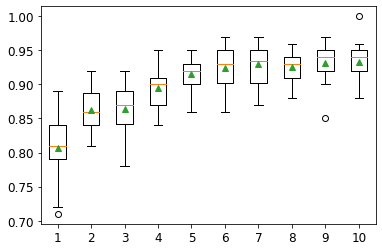

In [64]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# explore depths from 1 to 10
	for i in range(1,11):
		# define base model
		base = DecisionTreeClassifier(max_depth=i)
		# define ensemble model
		models[str(i)] = AdaBoostClassifier(base_estimator=base)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Explore Learning Rate

AdaBoost also supports a learning rate that controls the contribution of each model to the ensemble prediction.

This is controlled by the “learning_rate” argument and by default is set to 1.0 or full contribution. Smaller or larger values might be appropriate depending on the number of models used in the ensemble. There is a balance between the contribution of the models and the number of trees in the ensemble.

More trees may require a smaller learning rate; fewer trees may require a larger learning rate. It is common to use values between 0 and 1 and sometimes very small values to avoid overfitting such as 0.1, 0.01 or 0.001.

The example below explores learning rate values between 0.1 and 2.0 in 0.1 increments.

>0.100 0.767 (0.049)
>0.200 0.786 (0.042)
>0.300 0.802 (0.040)
>0.400 0.798 (0.037)
>0.500 0.805 (0.042)
>0.600 0.795 (0.031)
>0.700 0.799 (0.035)
>0.800 0.801 (0.033)
>0.900 0.805 (0.032)
>1.000 0.806 (0.041)
>1.100 0.801 (0.037)
>1.200 0.800 (0.030)
>1.300 0.799 (0.041)
>1.400 0.793 (0.041)
>1.500 0.790 (0.040)
>1.600 0.775 (0.034)
>1.700 0.767 (0.054)
>1.800 0.768 (0.040)
>1.900 0.736 (0.047)
>2.000 0.682 (0.048)


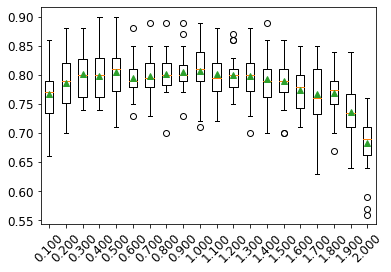

In [65]:

# explore adaboost ensemble learning rate effect on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# explore learning rates from 0.1 to 2 in 0.1 increments
	for i in arange(0.1, 2.1, 0.1):
		key = '%.3f' % i
		models[key] = AdaBoostClassifier(learning_rate=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

# Explore Alternate Algorithm

The default algorithm used in the ensemble is a decision tree, although other algorithms can be used.

The intent is to use very simple models, called weak learners. Also, the scikit-learn implementation requires that any models used must also support weighted samples, as they are how the ensemble is created by fitting models based on a weighted version of the training dataset.

The base model can be specified via the “base_estimator” argument. The base model must also support predicting probabilities or probability-like scores in the case of classification. If the specified model does not support a weighted training dataset, you will see an error message as follows:

ValueError: KNeighborsClassifier doesn't support sample_weight.
One example of a model that supports a weighted training is the logistic regression algorithm.

The example below demonstrates an AdaBoost algorithm with a LogisticRegression weak learner.

In [66]:
# evaluate adaboost algorithm with logistic regression weak learner for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model
model = AdaBoostClassifier(base_estimator=LogisticRegression())
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.794 (0.032)


# Grid Search AdaBoost Hyperparameters

AdaBoost can be challenging to configure as the algorithm as many key hyperparameters that influence the behavior of the model on training data and the hyperparameters interact with each other.

As such, it is a good practice to use a search process to discover a configuration of the model hyperparameters that works well or best for a given predictive modeling problem. Popular search processes include a random search and a grid search.

In this section we will look at grid searching common ranges for the key hyperparameters for the AdaBoost algorithm that you can use as starting point for your own projects. This can be achieving using the GridSearchCV class and specifying a dictionary that maps model hyperparameter names to the values to search.

In this case, we will grid search two key hyperparameters for AdaBoost: the number of trees used in the ensemble and the learning rate. We will use a range of popular well performing values for each hyperparameter.

Each configuration combination will be evaluated using repeated k-fold cross-validation and configurations will be compared using the mean score, in this case, classification accuracy.

The complete example of grid searching the key hyperparameters of the AdaBoost algorithm on our synthetic classification dataset is listed below.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model with default hyperparameters
model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
**************************************************************************************8

# GRADIENT BOOST

Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems.

Gradient boosting is also known as gradient tree boosting, stochastic gradient boosting (an extension), and gradient boosting machines, or GBM for short.

Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models. This is a type of ensemble machine learning model referred to as boosting.

Models are fit using any arbitrary differentiable loss function and gradient descent optimization algorithm. This gives the technique its name, “gradient boosting,” as the loss gradient is minimized as the model is fit, much like a neural network.

One way to produce a weighted combination of classifiers which optimizes [the cost] is by gradient descent in function space

— Boosting Algorithms as Gradient Descent in Function Space, 1999.

Naive gradient boosting is a greedy algorithm and can overfit the training dataset quickly.

It can benefit from regularization methods that penalize various parts of the algorithm and generally improve the performance of the algorithm by reducing overfitting.

There are three types of enhancements to basic gradient boosting that can improve performance:

Tree Constraints: such as the depth of the trees and the number of trees used in the ensemble.
Weighted Updates: such as a learning rate used to limit how much each tree contributes to the ensemble.
Random sampling: such as fitting trees on random subsets of features and samples.
The use of random sampling often leads to a change in the name of the algorithm to “stochastic gradient boosting.

In [68]:
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [69]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [70]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [71]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [72]:
X_new = np.array([[0.8]])

In [73]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [74]:
y_pred

array([0.61494706])

In [75]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

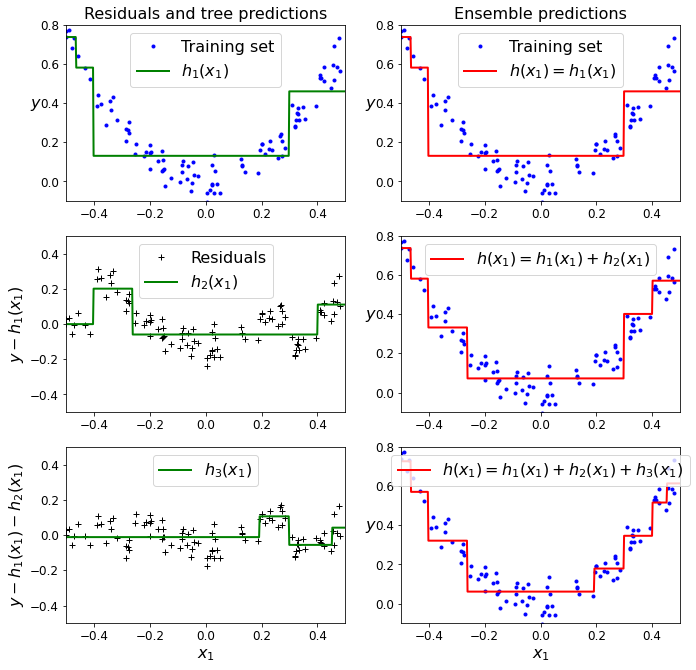

In [76]:
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

# Gradient Boost Regressor()

In [77]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [78]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

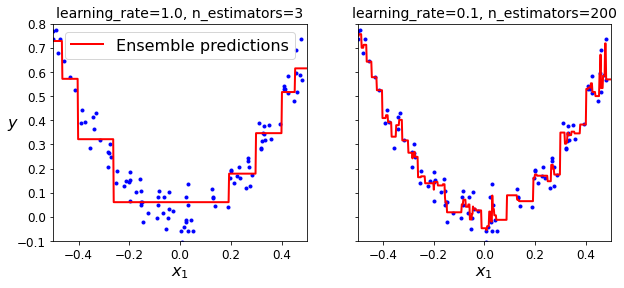

In [79]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

# Gradient Boosting with Early stopping

In [80]:
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=49, random_state=42)

In [81]:
min_error = np.min(errors)

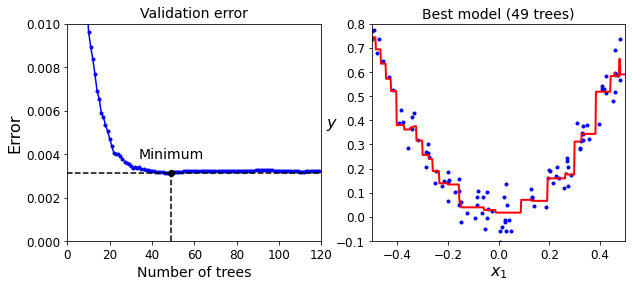

In [82]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

plt.show()


In [83]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [84]:
print(gbrt.n_estimators)

54


In [85]:
print("Minimum validation MSE:", min_val_error)

Minimum validation MSE: 0.003148815778909297


# XGBOOST 

XGBoost (extreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm. XGBoost has proved to be a highly effective ML algorithm, extensively used in machine learning competitions and hackathons. XGBoost has high predictive power and is almost 10 times faster than the other gradient boosting techniques. It also includes a variety of regularization which reduces overfitting and improves overall performance. Hence it is also known as ‘regularized boosting‘ technique.

Let us see how XGBoost is comparatively better than other techniques:

# Regularization:
Standard GBM implementation has no regularisation like XGBoost.
Thus XGBoost also helps to reduce overfitting.
# Parallel Processing:
XGBoost implements parallel processing and is faster than GBM .
XGBoost also supports implementation on Hadoop.
# High Flexibility:
XGBoost allows users to define custom optimization objectives and evaluation criteria adding a whole new dimension to the model.
# Handling Missing Values:
XGBoost has an in-built routine to handle missing values.
# Tree Pruning:
XGBoost makes splits up to the max_depth specified and then starts pruning the tree backwards and removes splits beyond which there is no positive gain.
# Built-in Cross-Validation:
XGBoost allows a user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run.

# Parameters

# nthread
This is used for parallel processing and the number of cores in the system should be entered..
If you wish to run on all cores, do not input this value. The algorithm will detect it automatically.
# eta
Analogous to learning rate in GBM.
Makes the model more robust by shrinking the weights on each step.
# min_child_weight
Defines the minimum sum of weights of all observations required in a child.
Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
# max_depth
It is used to define the maximum depth.
Higher depth will allow the model to learn relations very specific to a particular sample.
# max_leaf_nodes
The maximum number of terminal nodes or leaves in a tree.
Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
If this is defined, GBM will ignore max_depth.
# gamma
A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.
# subsample
Same as the subsample of GBM. Denotes the fraction of observations to be randomly sampled for each tree.
Lower values make the algorithm more conservative and prevent overfitting but values that are too small might lead to under-fitting.
# colsample_bytree
It is similar to max_features in GBM.
Denotes the fraction of columns to be randomly sampled for each tree.

In [89]:

from numpy import loadtxt
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [93]:

dataset = pd.read_csv("C:/Users/HOME/Desktop/machine learning/Random Forest/diabetes.csv", delimiter=",")

In [95]:
 dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [96]:
X = dataset.drop(['Outcome'], axis=1)

Y = dataset['Outcome']

In [97]:

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Train the XGBoost Model

In [98]:
model = XGBClassifier()
model.fit(X_train, y_train)

E:\ANAXONDA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:25:26] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [99]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


# Make Predictions with XGBoost Model

In [100]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [101]:

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.02%


# Light GBM

Before discussing how Light GBM works, let’s first understand why we need this algorithm when we have so many others (like the ones we have seen above). Light GBM beats all the other algorithms when the dataset is extremely large. Compared to the other algorithms, Light GBM takes lesser time to run on a huge dataset.

LightGBM is a gradient boosting framework that uses tree-based algorithms and follows leaf-wise approach while other algorithms work in a level-wise approach pattern. The images below will help you understand the difference in a better way.

# Parameters

# num_iterations:
It defines the number of boosting iterations to be performed.
# num_leaves :
This parameter is used to set the number of leaves to be formed in a tree.
In case of Light GBM, since splitting takes place leaf-wise rather than depth-wise, num_leaves must be smaller than 2^(max_depth), otherwise, it may lead to overfitting.
# min_data_in_leaf :
A very small value may cause overfitting.
It is also one of the most important parameters in dealing with overfitting.
# max_depth:
It specifies the maximum depth or level up to which a tree can grow.
A very high value for this parameter can cause overfitting.
# bagging_fraction:
It is used to specify the fraction of data to be used for each iteration.
This parameter is generally used to speed up the training.
# max_bin :
Defines the max number of bins that feature values will be bucketed in.
A smaller value of max_bin can save a lot of time as it buckets the feature values in discrete bins which is computationally inexpensive.

In [105]:
pip install lightgbm

In [106]:

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import lightgbm
from lightgbm import LGBMClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = LGBMClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.930 (0.027)


In [107]:
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = LGBMClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [0.2929949,-4.21223056,-1.288332,-2.17849815,-0.64527665,2.58097719,0.28422388,-7.1827928,-1.91211104,2.73729512,0.81395695,3.96973717,-2.66939799,3.34692332,4.19791821,0.99990998,-0.30201875,-4.43170633,-2.82646737,0.44916808]
yhat = model.predict([row])
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


# Lgbm for regression

In [108]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from lightgbm import LGBMRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# define the model
model = LGBMRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -60.004 (2.887)


In [109]:
from sklearn.datasets import make_regression
from lightgbm import LGBMRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# define the model
model = LGBMRegressor()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [0.20543991,-0.97049844,-0.81403429,-0.23842689,-0.60704084,-0.48541492,0.53113006,2.01834338,-0.90745243,-1.85859731,-1.02334791,-0.6877744,0.60984819,-0.70630121,-1.29161497,1.32385441,1.42150747,1.26567231,2.56569098,-0.11154792]
yhat = model.predict([row])
print('Prediction: %d' % yhat[0])

Prediction: 52


# The boosting type can be specified via the “boosting_type” argument and take a string to specify the type. The options include:

‘gbdt‘: Gradient Boosting Decision Tree (GDBT).

‘dart‘: Dropouts meet Multiple Additive Regression Trees (DART).

‘goss‘: Gradient-based One-Side Sampling (GOSS).

# dart‘: Dropouts meet Multiple Additive Regression Trees (DART).

DART is described in the 2015 paper titled “DART: Dropouts meet Multiple Additive Regression Trees” and, as its name suggests, adds the concept of dropout from deep learning to the Multiple Additive Regression Trees (MART) algorithm, a precursor to gradient boosting decision trees

# GOSS 

GOSS was introduced with the LightGBM paper and library. The approach seeks to only use instances that result in a large error gradient to update the model and drop the rest.

# classification  with the three key boosting techniques.

>gbdt 0.930 (0.027)
>dart 0.914 (0.029)
>goss 0.918 (0.028)


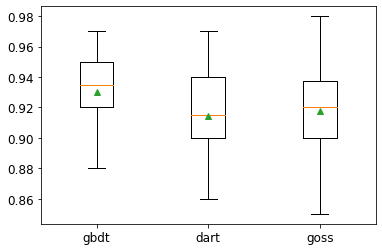

In [110]:
from numpy import arange
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	types = ['gbdt', 'dart', 'goss']
	for t in types:
		models[t] = LGBMClassifier(boosting_type=t)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# CatBoost
Handling categorical variables is a tedious process, especially when you have a large number of such variables. When your categorical variables have too many labels (i.e. they are highly cardinal), performing one-hot-encoding on them exponentially increases the dimensionality and it becomes really difficult to work with the dataset.

CatBoost can automatically deal with categorical variables and does not require extensive data preprocessing like other machine learning algorithms. 

# Parameters

# loss_function:
Defines the metric to be used for training.
# iterations:
The maximum number of trees that can be built.
The final number of trees may be less than or equal to this number.
# learning_rate:
Defines the learning rate.
Used for reducing the gradient step.
# border_count:
It specifies the number of splits for numerical features.
It is similar to the max_bin parameter.
# depth:
Defines the depth of the trees.
# random_seed:
This parameter is similar to the ‘random_state’ parameter we have seen previously.
It is an integer value to define the random seed for training.

In [111]:
pip install catboost

In [112]:
# check catboost version
import catboost


# CatBoost for Classification

In [113]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# evaluate the model
model = CatBoostClassifier(verbose=0, n_estimators=100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = CatBoostClassifier(verbose=0, n_estimators=100)
model.fit(X, y)
# make a single prediction
row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

Accuracy: 0.925 (0.025)
Prediction: 1


# CatBoost for Regression

In [114]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# evaluate the model
model = CatBoostRegressor(verbose=0, n_estimators=100)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = CatBoostRegressor(verbose=0, n_estimators=100)
model.fit(X, y)
# make a single prediction
row = [[2.02220122, 0.31563495, 0.82797464, -0.30620401, 0.16003707, -1.44411381, 0.87616892, -0.50446586, 0.23009474, 0.76201118]]
yhat = model.predict(row)
print('Prediction: %.3f' % yhat[0])

MAE: -9.701 (1.234)
Prediction: -81.905
